In [13]:
import sys
dir_repo = '../../'
sys.path.append(dir_repo)

import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

filename_pco = '/home/hhg/Research/emu_Nx2pt/data/pco_train_1000000.pkl'
dir_dataT = '/home/hhg/Research/emu_Nx2pt/data/train_1M/'

startID, endID = 0, 800000
seed = 3

In [14]:
with open(filename_pco, 'rb') as handle:
    pco_samples = pickle.load(handle)
    
df_pco = pd.DataFrame(pco_samples).iloc[startID:endID]
df_pco

,Omega_m,sigma_8,n_s,w0,wa,Omega_b,h0,A_ia,eta_ia,gas_0,gas_1,gas_2,gas_3,gas_7,gas_8,gas_9,gas_10
0,0.297210,0.844420,0.946421,-0.899775,0.920549,0.042484,0.709375,0.431978,-0.498661,1.169694,0.424419,13.401518,1.316665,6.522245,0.792762,-0.075719,-0.168358
1,0.299879,0.831514,0.973854,-0.826622,0.814782,0.039073,0.613814,0.406599,0.267230,1.177757,0.326897,13.799217,1.320319,6.433461,0.675128,0.117878,0.083608
2,0.312924,0.832181,0.980610,-0.797240,0.904636,0.044502,0.684378,0.527645,0.315681,1.167045,0.955779,14.335774,1.288770,6.633679,0.832012,-0.153872,-0.044284
3,0.301810,0.850645,0.955667,-1.071412,-0.417694,0.056777,0.715881,0.447567,0.234797,1.169956,0.943896,14.356193,0.997335,6.577022,0.670646,-0.117672,0.035089
4,0.328350,0.844306,0.999254,-0.774267,-0.586787,0.057157,0.659152,0.512589,-0.189984,1.162550,0.618421,14.138517,0.849018,6.452518,0.677463,-0.033036,-0.062468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,0.317842,0.821519,0.917088,-1.174172,-0.411715,0.041460,0.639346,0.590183,0.463593,1.172136,0.889806,13.805090,0.697733,6.640500,0.717878,0.156062,-0.031085
799996,0.318462,0.828420,0.961271,-0.961460,0.783886,0.050336,0.728949,0.489340,0.519621,1.170315,0.420581,14.612012,0.778131,6.619574,0.720009,-0.039564,0.136432
799997,0.329623,0.848470,0.977922,-1.155052,-0.319476,0.041836,0.601973,0.481840,0.592206,1.170516,0.749476,13.736033,0.917683,6.584985,0.670734,0.108155,0.159341
799998,0.317790,0.822479,0.951515,-0.793823,0.088510,0.044394,0.744637,0.475685,0.021967,1.170159,0.764314,14.326871,0.912305,6.508725,0.831143,0.084467,-0.008476


In [15]:
Nsamples = len(df_pco['Omega_m'])
sampleID = list(range(Nsamples))

In [16]:
trainIDs, validIDs = train_test_split(sampleID, train_size=0.8, random_state=seed)

In [22]:
df_pco_valid = df_pco.iloc[validIDs]
df_pco_train = df_pco.iloc[trainIDs]

# Plots

In [21]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rc('font', size=16)

Text(0, 0.5, '$\\sigma_8$')

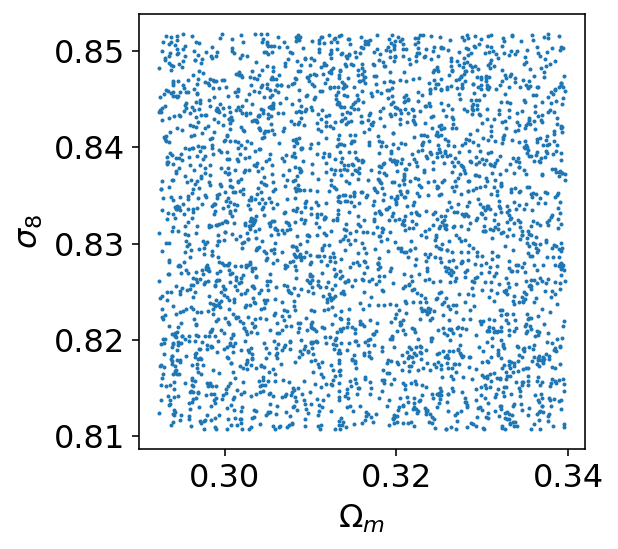

In [38]:
plt.figure(figsize=(4,4))
n = 50
plt.scatter(df_pco_valid['Omega_m'].values[::n], df_pco_valid['sigma_8'].values[::n], s=1)
plt.xlabel('$\Omega_m$')
plt.ylabel('$\sigma_8$')

Text(0, 0.5, '$\\sigma_8$')

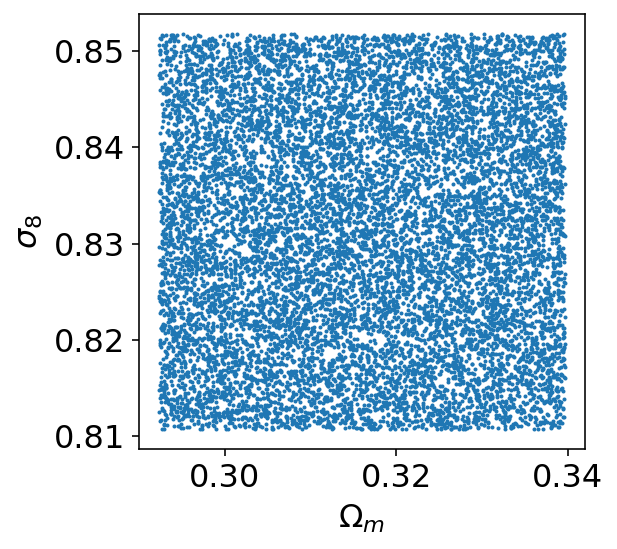

In [39]:
plt.figure(figsize=(4,4))
n = 50
plt.scatter(df_pco_train['Omega_m'].values[::n], df_pco_train['sigma_8'].values[::n], s=1)
plt.xlabel('$\Omega_m$')
plt.ylabel('$\sigma_8$')

(array([16092., 15876., 15895., 15922., 15950., 16032., 15991., 16087.,
        16175., 15980.]),
 array([0.81070346, 0.81480866, 0.81891387, 0.82301907, 0.82712428,
        0.83122948, 0.83533468, 0.83943989, 0.84354509, 0.8476503 ,
        0.8517555 ]),
 <BarContainer object of 10 artists>)

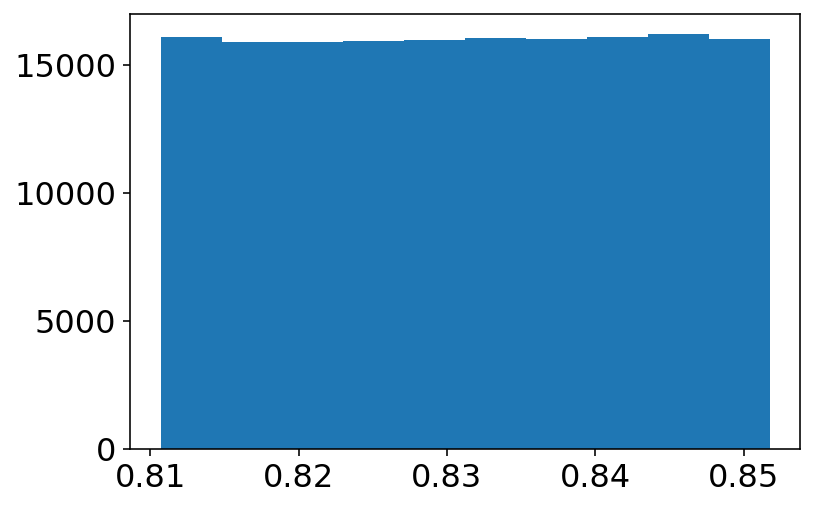

In [32]:
plt.hist(df_pco_valid['sigma_8'].values)

(array([64015., 63922., 64108., 64096., 64025., 64038., 64055., 64203.,
        63921., 63617.]),
 array([0.81070305, 0.81480829, 0.81891353, 0.82301877, 0.82712401,
        0.83122925, 0.83533449, 0.83943974, 0.84354498, 0.84765022,
        0.85175546]),
 <BarContainer object of 10 artists>)

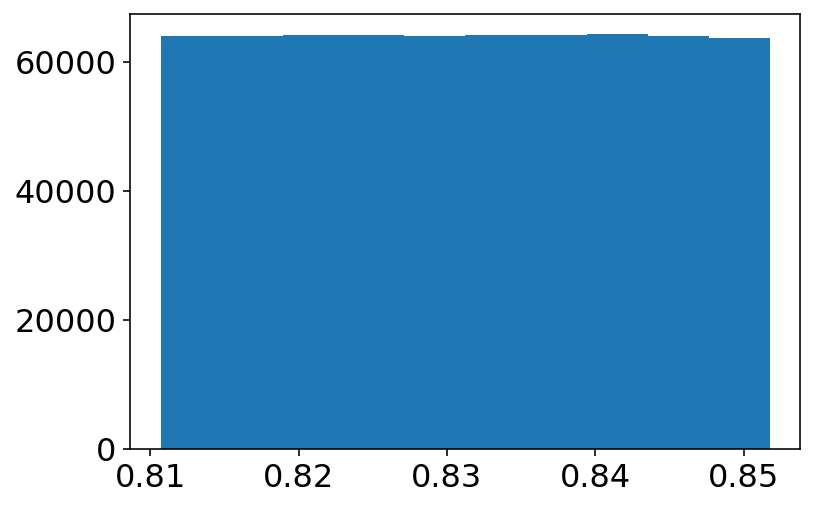

In [33]:
plt.hist(df_pco_train['sigma_8'].values)